In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn
import statistics 
import math
import scipy
import scipy.stats as stats

seaborn.set_context('talk')

In [4]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [5]:
def remove_outlier(df_in, col_name, iqr_factor):
    """
  IQR outliers removal (https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/)
  accept a dataframe, remove outliers, return cleaned data in a new dataframe
  see http://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm
  """
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3 - q1  # interquartile range
    fence_low = q1 - iqr_factor * iqr
    fence_high = q3 + iqr_factor * iqr
    df_inliers = df_in.loc[
        (df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)
    ]
    df_outliers = df_in.loc[
        (df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)
    ]
    return df_inliers, df_outliers

In [6]:
iqr_factor = 2.5
df_main_inliers, df_main_outliers = remove_outlier(df, "salary_monthly_NETO", iqr_factor)
df_main_inliers = df_main_inliers[df_main_inliers["salary_monthly_NETO"] > 24000]

<AxesSubplot:xlabel='gender', ylabel='frequency'>

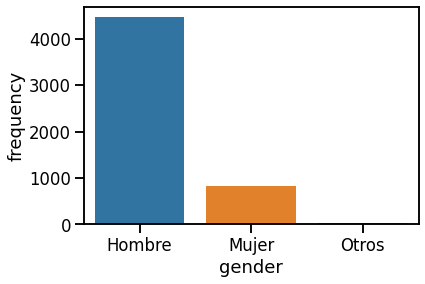

In [20]:
gender_count = df_main_inliers.profile_gender.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'gender', 'profile_gender': 'frequency'})
seaborn.barplot(data=gender_count, x="gender", y="frequency")

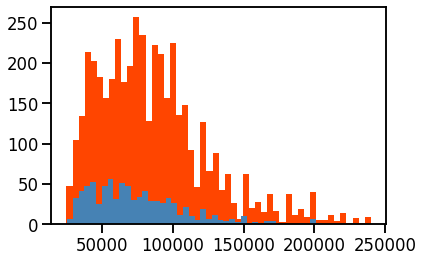

In [21]:
df_H = df_main_inliers[df_main_inliers.profile_gender == 'Hombre']
df_M = df_main_inliers[df_main_inliers.profile_gender == 'Mujer']

plt.hist(df_H.salary_monthly_NETO, color='orangered', bins=50)
plt.hist(df_M.salary_monthly_NETO, color='steelblue', bins=50)
plt.show()